## 02. 기본 EDA 및 데이터 전처리

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
train = pd.read_csv("data/train.csv")
test = pd.read_csv("data/test.csv")

In [10]:
all = pd.concat([train, test], axis=0, ignore_index=True)

In [11]:
all.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450


In [12]:
all.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived
count,1046.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000
mean,29.881138,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838
std,14.413493,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592
min,0.170000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,21.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000
50%,28.000000,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000
75%,39.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000
max,80.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000


In [46]:
all.describe(include='all')

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
count,1046.000000,295,1307,1308.000000,1309,1309.000000,1309.000000,1309.000000,1309,1309.000000,891.000000,1309
unique,NaN,186,3,NaN,1307,NaN,NaN,NaN,2,NaN,NaN,929
top,NaN,C23 C25 C27,S,NaN,"Kelly, Mr. James",NaN,NaN,NaN,male,NaN,NaN,CA. 2343
freq,NaN,6,914,NaN,2,NaN,NaN,NaN,843,NaN,NaN,11
mean,29.881138,NaN,NaN,33.295479,NaN,0.385027,655.000000,2.294882,NaN,0.498854,0.383838,NaN
std,14.413493,NaN,NaN,51.758668,NaN,0.865560,378.020061,0.837836,NaN,1.041658,0.486592,NaN
min,0.170000,NaN,NaN,0.000000,NaN,0.000000,1.000000,1.000000,NaN,0.000000,0.000000,NaN
25%,21.000000,NaN,NaN,7.895800,NaN,0.000000,328.000000,2.000000,NaN,0.000000,0.000000,NaN
50%,28.000000,NaN,NaN,14.454200,NaN,0.000000,655.000000,3.000000,NaN,0.000000,0.000000,NaN
75%,39.000000,NaN,NaN,31.275000,NaN,0.000000,982.000000,3.000000,NaN,1.000000,1.000000,NaN


In [13]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


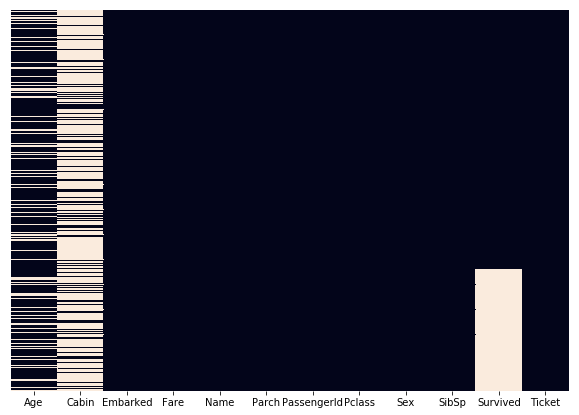

In [16]:
plt.figure(figsize=(10,7))
sns.heatmap(all.isnull(), yticklabels=False, cbar=False)  # cbar : colorbar를 그리지 않음.

### NA를 가진 열만 확인하기

In [66]:
all.isnull().any()

5

### 생존자 사망자의 비율이 얼마나 될까?

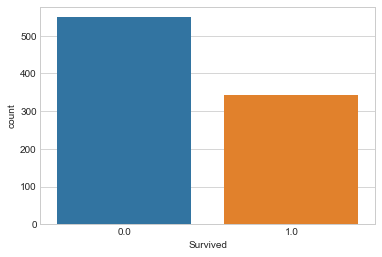

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=all)

In [54]:
all['Survived'].value_counts() / all['Survived'].value_counts().sum()

0.0    0.616162
1.0    0.383838
Name: Survived, dtype: float64

### 그렇다면 생존자의 남녀는 어느정도일까?

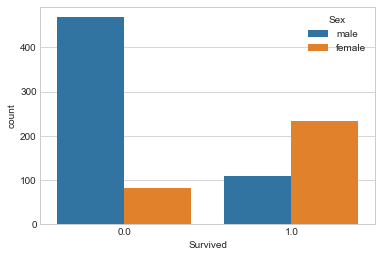

In [18]:
sns.countplot(x='Survived', hue='Sex', data=all)

In [64]:
print( all['Survived'][all['Sex']=='female'].value_counts() ) # 여성의 생존자와 사망자
print( all['Survived'][all['Sex']=='male'].value_counts() )   # 남성의 생존자와 사망자

1.0    233
0.0     81
Name: Survived, dtype: int64
0.0    468
1.0    109
Name: Survived, dtype: int64


* 비율상 여성이 많이 생존했다.

### Pclass 에 따른 생존자의 수는 어떻게 될까?

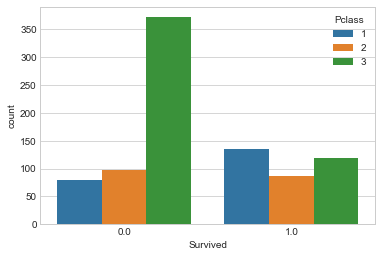

In [19]:
sns.countplot(x='Survived', hue='Pclass',data=all)

### 나이(Age)에 대해 살펴보자

C:\Users\WITHJS\Anaconda3\lib\site-packages\numpy\core\_methods.py:29: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims)
C:\Users\WITHJS\Anaconda3\lib\site-packages\numpy\core\_methods.py:26: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims)


ValueError: max must be larger than min in range parameter.

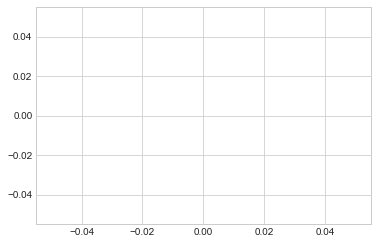

In [21]:
sns.distplot(all['Age'], bins=30)  # 에러 발생. 결측치 때문에

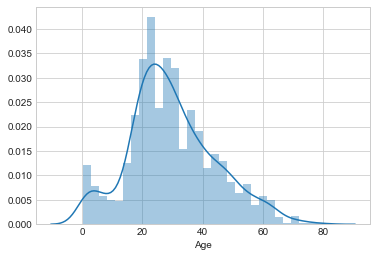

In [24]:
# bins : argument for matplotlib hist(), or None, optional
sns.distplot(all['Age'].dropna(), bins=30)

* 20-30대의 연령대의 많은 사람들이 있었다

### 그렇다면 Pclass와 Age의 관계를 살펴보자.

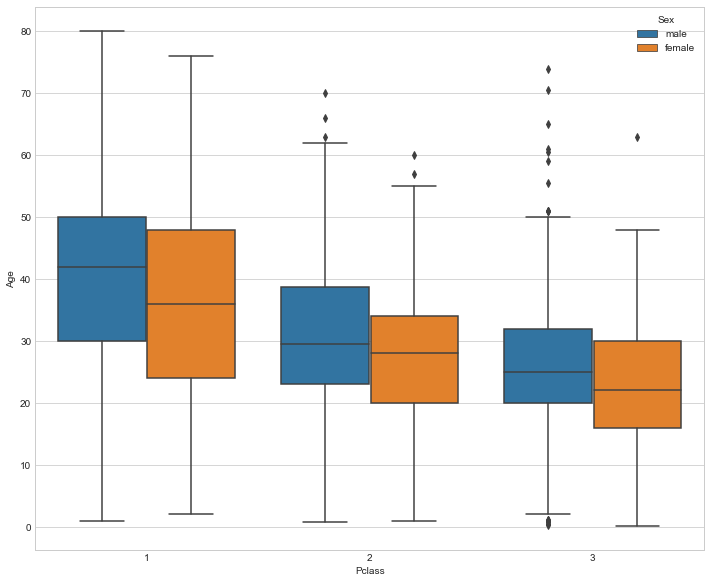

In [27]:
plt.figure(figsize=(12,10))
sns.boxplot(x='Pclass', y='Age', hue='Sex', data=all)

* 나이가 많을 수록 1,2,3 등급으로 분포되어 있다.

In [36]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 122.8+ KB


C:\Users\WITHJS\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\WITHJS\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


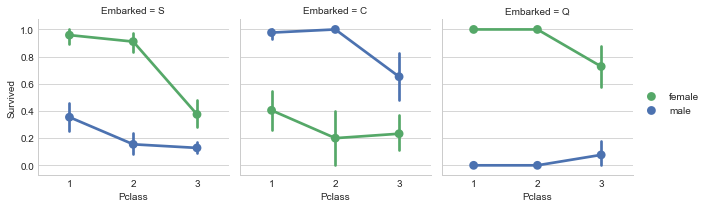

### 결측치 처리를 해 보자.

In [38]:
all.groupby('Pclass').mean()['Age']

Pclass
1    39.159930
2    29.506705
3    24.816367
Name: Age, dtype: float64

In [44]:
mean_age  = all.groupby('Pclass').mean()['Age']
print(mean_age[1],mean_age[2], mean_age[3])

39.15992957746479 29.506704980842912 24.81636726546906


In [ ]:
e = sns.FacetGrid(all, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()